## Week 6: Dimensionality Reduction (PCA) and Model Validation

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**(1a) Load the data file 'data1.csv' and visualize the data using a scatter plot.**

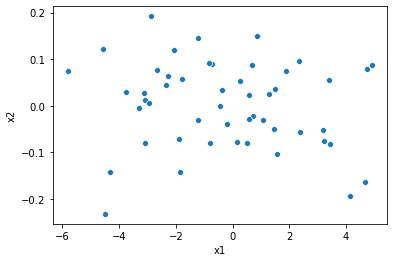

In [2]:
# Write Code here
data1 = pd.read_csv('data1.csv', names=['x1','x2'])
sns.scatterplot(x=data1['x1'], y=data1['x2'])
#plt.xlabel("x1")
#plt.ylabel("x2")
plt.show();

**Let $\bar{x} = (x_1, x_2, x_3, \cdots, x_m)$ denote a data point with $m$ features. Suppose we approximate $\bar{x}$ with fewer features, say two features $x_1$ and $x_2$, as $\bar{y} = (x_1, x_2, 0, \cdots, 0)$. Now, define the loss due to the representation as $\lVert \bar{x} - \bar{y} \rVert^2 = x_3^2 + \cdots + x_m^2$. **

**(1b) Find a single feature representation of the data (in data1.csv) such that the loss in representation is minimum.**

In [3]:
# Write Code here
#As there are only two features

#if feature 1 is selected 
loss1 = np.sum(np.square(data1['x2']))

#if feature 2 is selected
loss2 = np.sum(np.square(data1['x1']))

if loss1>loss2:
    print('loss1: %.3f | loss2: %.3f \nx2 is the feature with minimum loss in representation' %(loss1,loss2))
else:
    print('loss1: %.3f | loss2: %.3f \nx1 is the feature with minimum loss in representation' %(loss1,loss2))

loss1: 0.419 | loss2: 358.104 
x1 is the feature with minimum loss in representation


**(1c) Visualize the approximated data and compare it with the original data using scatter plot**

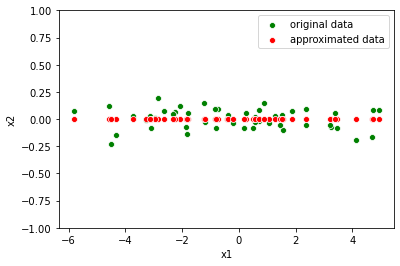

In [4]:
# Write Code here
sns.scatterplot(x=data1['x1'], y=data1['x2'], color='green', label='original data')
sns.scatterplot(x=data1['x1'], y=np.zeros(data1['x2'].shape), color='red', label='approximated data')
plt.legend()
plt.ylim(-1,1);

**(2a) Load the data file 'data2.csv'.**

In [77]:
data2 = pd.read_csv('data2.csv', header=None)
data2.shape

(1000, 4)

**(2b) Plot the minimum representation loss as a function of the number of features used for representation. Vary the number of features from 0 to 3**

Minimum represntation loss for selecting 0 features is 1053532.71
Minimum represntation loss for selecting 1 features is 40144.08
Minimum represntation loss for selecting 2 features is 995.82
Minimum represntation loss for selecting 3 features is 5.11


Text(0, 0.5, 'Minimum representation loss')

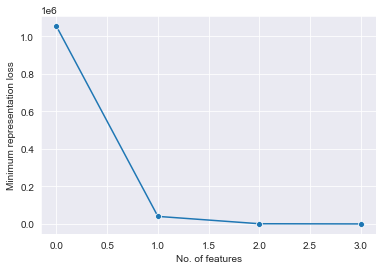

In [67]:
# 2b
losses = np.sum(np.square(data2))
min_loss = [0]*4

for i in range(4):
    min_loss[i] = np.sum(np.sort(losses)[0:4-i])
    print('Minimum represntation loss for selecting %d features is %.2f' %(i,min_loss[i]))

sns.set_style("darkgrid")
sns.lineplot(range(4),y=min_loss,marker="o")
plt.xlabel("No. of features")
plt.ylabel("Minimum representation loss")


    

**(2c) Order the features in decreasing order of significance (with respect to the representation loss).**

In [36]:
#2c
print('Decreasing order of Importance:',np.array(np.argsort(-losses)))

Decreasing order of Importance: [2 1 0 3]


**(2d) Compute the covariance matrix of the data. Give your observations between the values in covariance matrix and feature importance obtained in (2c).**

In [82]:
# 2d
data2_shifted = data2 - data2.mean()
CovM = np.cov(data2_shifted.T)
print('Covariance matrix is:\n', CovM)

print('\nDiagonal values represnt variances of each feature',np.diag(CovM))

Covariance matrix is:
 [[ 9.87196296e-01 -5.71788428e-02 -1.40990871e-01  3.05657061e-03]
 [-5.71788428e-02  3.91821903e+01  1.16676059e-01 -7.77027357e-03]
 [-1.40990871e-01  1.16676059e-01  1.00898980e+03  5.58349417e-02]
 [ 3.05657061e-03 -7.77027357e-03  5.58349417e-02  5.09299247e-03]]

Diagonal values represnt variances of each feature [9.87196296e-01 3.91821903e+01 1.00898980e+03 5.09299247e-03]


The decreasing order of variances follows [2 1 0 3]

**(3a) Load the data file 'data3.csv' and visualize the data.**

**(3b) Compute the covariance matrix $C$ of data**

2020-10-18 20:54:20,308 NumExpr defaulting to 4 threads.


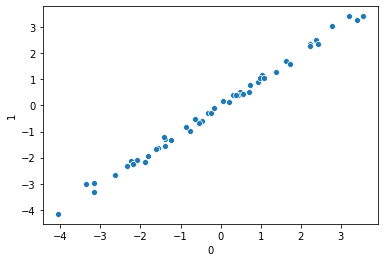

Covariance Matrix:
 [[3.59416569 3.61756379]
 [3.61756379 3.65805865]]


In [39]:
# Write code here
#3a
data3 = pd.read_csv('data3.csv', header=None)
sns.scatterplot(data3[0],data3[1])
plt.show();

#3b
M = np.mean(data3.T, axis=1)

Xs = data3 - M
V = np.cov(Xs.T)
print('Covariance Matrix:\n',V)



**(3c) Apply PCA to transform data by retaining only 1 PC. Now, visualize the data points in transformed 1-dimensional space**

Eigen values:
 [0.00840733 7.24381702] 
Eigen Vectors:
 [[-0.710222   -0.70397777]
 [ 0.70397777 -0.710222  ]]


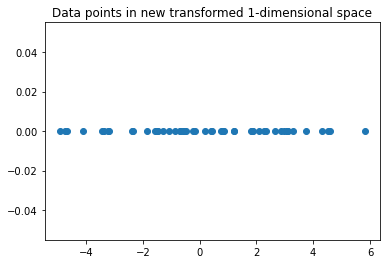

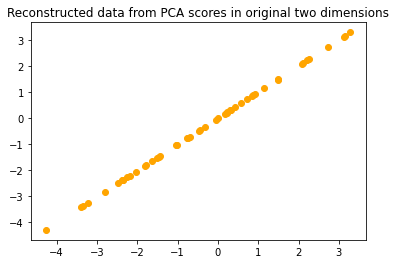

In [129]:
# Write code here
# eigendecomposition of covariance matrix
values, vectors = np.linalg.eig(V)
print('Eigen values:\n',values,'\nEigen Vectors:\n',vectors)
# project data
#P = vectors[:,-1].T.dot(Xs.T)
P=data3.dot(vectors[:,-1])
plt.scatter(P,P*0)
plt.title('Data points in new transformed 1-dimensional space');
plt.show();

P = np.array(P).reshape(-1,1)
vi = np.array(vectors[:,-1]).reshape(-1,1)
rec_data3 = P.dot(vi.T)
rec_data3 += data3.mean()

plt.scatter(rec_data3[:,0],rec_data3[:,1],color='orange')
plt.title('Reconstructed data from PCA scores in original two dimensions')
plt.show();

**(3d) Compute the representational loss (with respect to the original data).**

**(3e) Compare the above representation loss with the loss your would incur if you attempted a one-dimensional representation without any transformation. Comment on it.**


In [133]:
#Write code here
#3d
#computing representational loss
pca_loss = np.sum(np.sum(np.square(data3-rec_data3)))
print("Represenatational loss (with respect to the original data) after PCA:", pca_loss)


print("Represenatational loss using only x2:",np.sum(data3[0]**2))
print("Represenatational loss using only x1:",np.sum(data3[1]**2))


Represenatational loss (with respect to the original data) after PCA: 3.5755329009351517
Represenatational loss using only x2: 177.66749559601547
Represenatational loss using only x1: 180.85513738058907


Representation loss from PCA is much less than the loss we would incur if you attempted a one-dimensional representation without any transformation

### Application of PCA on real dataset

**(4a) Load the human face data set from sklearn (fetch_lfw_people).**

In [72]:
import logging
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


import os
import os.path
from sklearn.datasets import fetch_lfw_people

direc = os.path.join(os.getcwd(),"faces")
faces = fetch_lfw_people(min_faces_per_person=60, data_home=direc)

**(4b) Apply PCA on the faces data (sklearn can be used). Take the top 150 features from PCA. Reconstruct the images with the these 150 features and visualise them. Give your observations.**


Original images


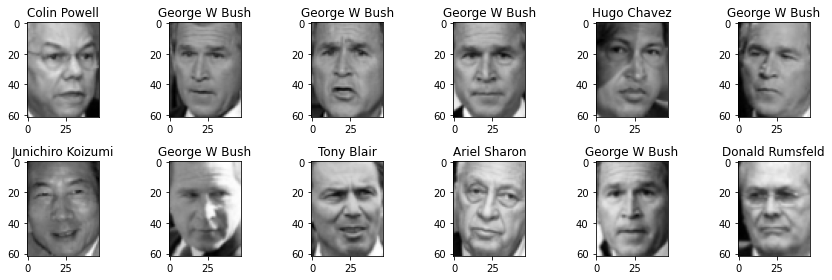


Reconstructed images (top 150 features)


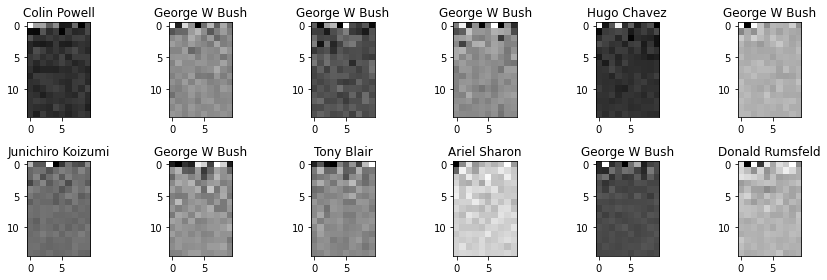

In [75]:
#4b
from sklearn.decomposition import PCA
pca = PCA(n_components=150)


facesData = faces.data
facesImages = faces.images
y = faces.target
target_names = faces.target_names

data_pca = pca.fit_transform(facesData)
pca_images = data_pca.reshape(-1,15,10) #150=10*15
print("\nOriginal images")

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    fig.add_subplot(2, 6, i+1)
    plt.imshow(facesImages[i],cmap=plt.cm.gray)
    plt.title(target_names[y[i]])
plt.tight_layout()
plt.show();

print("\nReconstructed images (top 150 features)")
fig = plt.figure(figsize=(12, 4))
for i in range(12):
    fig.add_subplot(2, 6, i+1)
    plt.imshow(pca_images[i],cmap=plt.cm.gray)
    plt.title(target_names[y[i]])
plt.tight_layout()
plt.show()

### 5) Cross validation to select parameters for Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$


Perform ridge rigression using gradient descent on the data 4 provided. (You can use sklearn)

Try to fit the data with polynomial of degree 3 and 

- For $\lambda$ choose from = [10,100,1000]
- choose learning rate (here it is $\alpha$)= [ 0.01,0.001,0.0001]
- max_iters = 1000

Choose the best combination of $\lambda$ and $\alpha$ using 5-fold cross validation on the dataset provided and report the same.


In [35]:
# Write your code here
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

X = pd.read_csv(r"data_X.txt",header=None, delim_whitespace=True)
y = pd.read_csv(r"data_y.txt", header= None)

del X[13]
y = y.drop([506])

In [37]:
X = pd.DataFrame(StandardScaler().fit_transform(X)) #Scaling the data
X_poly = PolynomialFeatures(degree=3).fit_transform(X)

lambdas = [10,100,1000]
alphas = [0.01, 0.001, 0.0001]
max_iters = 1000
scores = 0


for lamda in lambdas:
    for alpha in alphas:
        reg = SGDRegressor(alpha=lamda, max_iter =max_iters, learning_rate='constant', eta0=alpha)
        scores = cross_val_score(reg,X_poly, y, scoring='neg_mean_squared_error', cv=5)
        print("lambda =", lamda,", Learning rate =", alpha,", MSE =", -sum(scores)/5,"\n")

lambda = 10 , Learning rate = 0.01 , MSE = 4.989365712555868e+25 

lambda = 10 , Learning rate = 0.001 , MSE = 3.2403097883118926e+26 

lambda = 10 , Learning rate = 0.0001 , MSE = 3.319856639645806e+24 

lambda = 100 , Learning rate = 0.01 , MSE = 1.154931976839646e+21 

lambda = 100 , Learning rate = 0.001 , MSE = 2.7301699658073414e+22 

lambda = 100 , Learning rate = 0.0001 , MSE = 2.299376514347965e+19 

lambda = 1000 , Learning rate = 0.01 , MSE = 9.017006766423841e+23 

lambda = 1000 , Learning rate = 0.001 , MSE = 91.04633844247755 

lambda = 1000 , Learning rate = 0.0001 , MSE = 80.48414167656554 



Best combination is lambda = 1000, and learning rate = 0.0001